# Assignment 7 - Bayes Classification
*By Sebastian Bentley|cph-sb287 and Mathias Parking|cph-np525*

## Exploring the data
Explanation of values: https://archive.ics.uci.edu/ml/datasets/Divorce+Predictors+data+set#

In [5]:
import pandas as pd

df = pd.read_excel('datasets/divorce.xlsx')
df.head()

,Atr1,Atr2,Atr3,Atr4,Atr5,Atr6,Atr7,Atr8,Atr9,Atr10,...,Atr46,Atr47,Atr48,Atr49,Atr50,Atr51,Atr52,Atr53,Atr54,Class
0,2,2,4,1,0,0,0,0,0,0,...,2,1,3,3,3,2,3,2,1,1
1,4,4,4,4,4,0,0,4,4,4,...,2,2,3,4,4,4,4,2,2,1
2,2,2,2,2,1,3,2,1,1,2,...,3,2,3,1,1,1,2,2,2,1
3,3,2,3,2,3,3,3,3,3,3,...,2,2,3,3,3,3,2,2,2,1
4,2,2,1,1,1,1,0,0,0,0,...,2,1,2,3,2,2,2,1,0,1


In [6]:
df.describe()

,Atr1,Atr2,Atr3,Atr4,Atr5,Atr6,Atr7,Atr8,Atr9,Atr10,...,Atr46,Atr47,Atr48,Atr49,Atr50,Atr51,Atr52,Atr53,Atr54,Class
count,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,...,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000
mean,1.776471,1.652941,1.764706,1.482353,1.541176,0.747059,0.494118,1.452941,1.458824,1.576471,...,2.552941,2.270588,2.741176,2.382353,2.429412,2.476471,2.517647,2.241176,2.011765,0.494118
std,1.627257,1.468654,1.415444,1.504327,1.632169,0.904046,0.898698,1.546371,1.557976,1.421529,...,1.371786,1.586841,1.137348,1.511587,1.405090,1.260238,1.476537,1.505634,1.667611,0.501442
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,0.000000
50%,2.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,2.000000,...,3.000000,2.000000,3.000000,3.000000,2.000000,3.000000,3.000000,2.000000,2.000000,0.000000
75%,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000,1.000000,3.000000,3.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000
max,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000


array([[<AxesSubplot:title={'center':'Atr1'}>,
        <AxesSubplot:title={'center':'Atr2'}>,
        <AxesSubplot:title={'center':'Atr3'}>,
        <AxesSubplot:title={'center':'Atr4'}>,
        <AxesSubplot:title={'center':'Atr5'}>,
        <AxesSubplot:title={'center':'Atr6'}>,
        <AxesSubplot:title={'center':'Atr7'}>],
       [<AxesSubplot:title={'center':'Atr8'}>,
        <AxesSubplot:title={'center':'Atr9'}>,
        <AxesSubplot:title={'center':'Atr10'}>,
        <AxesSubplot:title={'center':'Atr11'}>,
        <AxesSubplot:title={'center':'Atr12'}>,
        <AxesSubplot:title={'center':'Atr13'}>,
        <AxesSubplot:title={'center':'Atr14'}>],
       [<AxesSubplot:title={'center':'Atr15'}>,
        <AxesSubplot:title={'center':'Atr16'}>,
        <AxesSubplot:title={'center':'Atr17'}>,
        <AxesSubplot:title={'center':'Atr18'}>,
        <AxesSubplot:title={'center':'Atr19'}>,
        <AxesSubplot:title={'center':'Atr20'}>,
        <AxesSubplot:title={'center':'Atr21'}>]

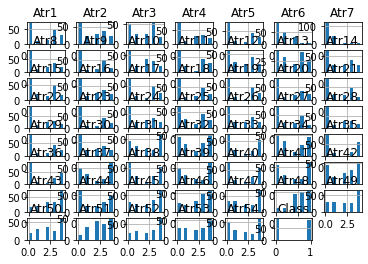

In [9]:
df.hist()

In [13]:
set(df.dtypes)

{dtype('int64')}

In [14]:
set(df.isnull().sum())

{0}

## Splitting the data into training and test
**Exploring:** Seems like there are only integers, and none of them are null. However, there are a lot of dimension, let's split the dataset into training and testing, and use dimentional reduction (PCA), while keeping 98% accuracy!

In [16]:
from sklearn import model_selection
# Convert the dataset into two arrays
array = df.values
# Create two (sub) arrays from it
X = array[:,0:54] # data without class
y = array[:,54]   # just class

#Split into train and test
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.35, random_state=7)

In [24]:
# To run the model faster, we use dimensional reduction (PCA)
from sklearn.decomposition import PCA

pca = PCA(0.98) #keep 9% accuracy

X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

pca.n_components_

25

## Choosing and training a model
Now let's train a model, using naive bayes GaussianNB.

In [46]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train_pca, y_train)

GaussianNB()

In [47]:
score = model.score(X_test_pca, y_test)
print(score, 'not too bad!')

0.9833333333333333 not too bad!


In [49]:
# Test on the test data, try prediction
prediction = model.predict(X_test_pca)
prediction

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0], dtype=int64)

In [33]:
prediction.shape

(60,)

## Evaluation

In [50]:
from sklearn.metrics import accuracy_score
# Calculated accuracy of the model over the validation set
print(accuracy_score(y_test, prediction))

0.9833333333333333


In [51]:
from sklearn.metrics import confusion_matrix
# Confusion matrix provides an indication of the the errors of prediction
print(confusion_matrix(y_test, prediction))

[[35  0]
 [ 1 24]]


In [52]:
from sklearn.metrics import classification_report
# Classification report provides a breakdown of each class by precision, recall, f1-score and support
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        35
           1       1.00      0.96      0.98        25

    accuracy                           0.98        60
   macro avg       0.99      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60



## Testing

In [55]:
#This should en in divorce
test_divorce = [[3,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,0,0,0,2,0,0,0,0,0,2,3,3,3,4,4,4,4,4,4,4,4,1,1,1,1,1,1,3,2,2,2,4,4,4]] # should end in divorce.
divorce_pca = pca.transform(test_divorce)

def isDivorced(d):
    if(d==1):
        return 'Divorced'
    else:
        return 'Still togehter'

prediction_test = model.predict(divorce_pca)

print("Prediction for test_divorce:", isDivorced(prediction_test[0]))

Prediction for test_divorce: Divorced


## Trying another classification method
We have chosen to use the Random Forest Regressor.

In [64]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(X_train_pca, y_train)

RandomForestRegressor()

In [69]:
from sklearn.metrics import mean_squared_error
import numpy as np
divorced_predictions = forest_reg.predict(X_test_pca)

forest_mse = mean_squared_error(y_test, divorced_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

0.015491933384829668

In [79]:
print(accuracy_score(y_test, np.array(prediction)))

0.9833333333333333


In [82]:
print("Prediction for test_divorce:", isDivorced(prediction_test[0]))

Prediction for test_divorce: Divorced


Seems like Random Forest Regressor also works, with an accuracy of 98%!